# Trafic Light Classificator

In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/azheng/anaconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
%matplotlib inline

In [4]:
fig = plt.figure()


## 1. Data Import

In [14]:
X_train = []
x_label = []
for img_class, directory in enumerate(['red', 'yellow', 'green', 'none']):
    for i, file_name in enumerate(glob.glob("{}/*.jpg".format(directory))):
        file = cv2.imread(file_name)

        file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB);
        resized = cv2.resize(file, (32,32))

        X_train.append(resized/255.)
        x_label.append(img_class)
        
        #if (i < 3):
        #    plt.imshow(rgb)
        #    plt.show()
        
X_train = np.array(X_train)
x_label = np.array(x_label)

In [6]:
x_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,

## 2. CNN

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Activation
from keras.utils.np_utils import to_categorical
from keras import losses, optimizers, regularizers

In [8]:
categorical_labels = to_categorical(x_label)

In [9]:
# num_classes = 4
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(64, 32, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(MaxPooling2D(2,2))
# Dropout(0.8)
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(MaxPooling2D(2,2))
# Dropout(0.8)
# model.add(Flatten())

# #model.add(Dense(128, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(8, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(num_classes, activation='softmax'))

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4))
model.add(Activation('softmax'))

In [11]:
loss = losses.categorical_crossentropy
optimizer = optimizers.Adam()

In [12]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [15]:
model.fit(X_train, categorical_labels, batch_size=32, epochs=30, verbose=True, validation_split=0.1, shuffle=True)

Train on 330 samples, validate on 37 samples
Epoch 1/30
330/330 [==============================] - 0s - loss: 1.2380 - acc: 0.4000 - val_loss: 2.1980 - val_acc: 0.0000e+00
Epoch 2/30
330/330 [==============================] - 0s - loss: 0.9078 - acc: 0.7182 - val_loss: 2.1328 - val_acc: 0.0270
Epoch 3/30
330/330 [==============================] - 0s - loss: 0.6113 - acc: 0.8576 - val_loss: 2.3838 - val_acc: 0.0270
Epoch 4/30
330/330 [==============================] - 0s - loss: 0.4250 - acc: 0.8788 - val_loss: 2.4102 - val_acc: 0.0270
Epoch 5/30
330/330 [==============================] - 0s - loss: 0.3081 - acc: 0.9242 - val_loss: 1.8928 - val_acc: 0.4865
Epoch 6/30
330/330 [==============================] - 0s - loss: 0.2369 - acc: 0.9515 - val_loss: 1.7999 - val_acc: 0.5946
Epoch 7/30
330/330 [==============================] - 0s - loss: 0.1934 - acc: 0.9455 - val_loss: 1.4833 - val_acc: 0.6757
Epoch 8/30
330/330 [==============================] - 0s - loss: 0.1463 - acc: 0.9636 - va

In [16]:
score = model.evaluate(X_train, categorical_labels, verbose=0)

In [17]:
print(score)

[0.22704448965086274, 0.9673024529657182]


In [18]:
prediction = model.predict(X_train, verbose=1)
for i in range(len(prediction)):
    print (i, prediction[i], categorical_labels[i])

352/367 [===========================>..] - ETA: 0s0 [9.9975044e-01 1.5356040e-04 3.5160800e-05 6.0838513e-05] [1. 0. 0. 0.]
1 [9.9237567e-01 2.5044484e-03 1.7422166e-04 4.9455818e-03] [1. 0. 0. 0.]
2 [9.9824762e-01 6.2372774e-04 3.4034703e-04 7.8831310e-04] [1. 0. 0. 0.]
3 [9.9970955e-01 3.7521364e-05 4.1012070e-05 2.1187234e-04] [1. 0. 0. 0.]
4 [9.9705005e-01 7.1893993e-04 3.7807600e-05 2.1931482e-03] [1. 0. 0. 0.]
5 [9.9918705e-01 5.7857466e-04 5.8399532e-06 2.2857181e-04] [1. 0. 0. 0.]
6 [0.79770935 0.00652057 0.02444451 0.17132555] [1. 0. 0. 0.]
7 [0.91886985 0.01701685 0.01803443 0.0460789 ] [1. 0. 0. 0.]
8 [0.87408185 0.02334581 0.01553405 0.08703832] [1. 0. 0. 0.]
9 [0.8102479  0.00812984 0.00362214 0.1780002 ] [1. 0. 0. 0.]
10 [9.8176438e-01 1.1574444e-02 6.6461149e-03 1.5057824e-05] [1. 0. 0. 0.]
11 [9.8970616e-01 9.8179342e-05 9.9877203e-03 2.0798109e-04] [1. 0. 0. 0.]
12 [0.9647956  0.01799259 0.01547147 0.0017403 ] [1. 0. 0. 0.]
13 [9.9190301e-01 2.7025440e-03 5.3230533e-03

130 [3.6766909e-05 9.9995840e-01 4.8301517e-06 4.0236028e-08] [0. 1. 0. 0.]
131 [2.3853947e-05 9.9962008e-01 3.3454396e-04 2.1426693e-05] [0. 1. 0. 0.]
132 [5.9541816e-07 9.9945623e-01 4.6620442e-04 7.7016921e-05] [0. 1. 0. 0.]
133 [6.4940838e-04 9.9885023e-01 4.9671117e-04 3.7470293e-06] [0. 1. 0. 0.]
134 [2.7296727e-04 9.9971777e-01 3.9959633e-07 8.7635635e-06] [0. 1. 0. 0.]
135 [9.7028016e-05 9.9987042e-01 3.1695894e-05 8.8683839e-07] [0. 1. 0. 0.]
136 [1.0495421e-03 9.9859136e-01 3.4808402e-04 1.0892408e-05] [0. 1. 0. 0.]
137 [1.1947497e-03 9.9833894e-01 4.5025145e-04 1.6105243e-05] [0. 1. 0. 0.]
138 [1.2342958e-03 9.9584585e-01 2.8808897e-03 3.8969178e-05] [0. 1. 0. 0.]
139 [8.1225665e-04 9.9886703e-01 3.1801799e-04 2.6864366e-06] [0. 1. 0. 0.]
140 [4.483249e-04 9.982925e-01 1.258552e-03 6.055654e-07] [0. 1. 0. 0.]
141 [2.6733484e-05 9.9949062e-01 4.8066952e-04 1.9636300e-06] [0. 1. 0. 0.]
142 [4.1084713e-05 9.9995434e-01 4.4894014e-06 1.2264044e-07] [0. 1. 0. 0.]
143 [5.3522745e-

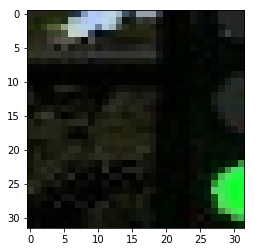

In [19]:
plt.imshow(X_train[183])

In [23]:
import h5py
model.save('classifier_sim.h5')

In [20]:
prediction[183]

array([0.00570397, 0.00648432, 0.9368034 , 0.05100834], dtype=float32)

In [22]:
prediction[183].tolist()

[0.005703971721231937,
 0.006484320852905512,
 0.93680340051651,
 0.05100833997130394]